In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
'''- station - used weather station number: 1 to 25
- Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

  LDAPS- Land Data Assimilation System- data like:
  "Land surface temperature
   Soil moisture content
   Evapotranspiration rates
   Vegetation indices
   Surface albedo
   Surface roughness"
   
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPSTmaxlapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPSTminlapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
- DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T  '''

'- station - used weather station number: 1 to 25\n- Date - Present day: yyyy-mm-dd (\'2013-06-30\' to \'2017-08-30\')\n- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6\n- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9\n\n  LDAPS- Land Data Assimilation System- data like:\n  "Land surface temperature\n   Soil moisture content\n   Evapotranspiration rates\n   Vegetation indices\n   Surface albedo\n   Surface roughness"\n   \n- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5\n- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100\n- LDAPSTmaxlapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5\n- LDAPSTminlapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6\n- LDAPS_WS - LDAPS model forecast of next-day average w

In [44]:
#import
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#read the data into a data frame
df = pd.read_csv("/kaggle/input/temperature-forecast-project-using-ml/temp.csv")

In [46]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


TARGET IS NEXT DAY TEMPERATURE : Next_Tmin, Next_Tmax

7752 rows 25 cols



In [47]:
df.shape

(7752, 25)

In [48]:
df.dtypes.value_counts()

float64    24
object      1
dtype: int64

In [49]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

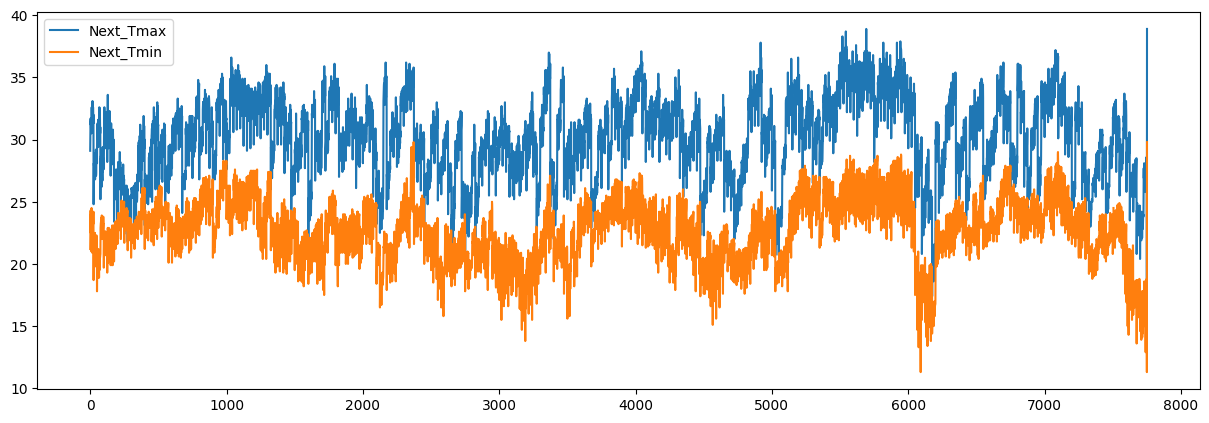

In [50]:
#data visualization

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df["Next_Tmax"], label = "Next_Tmax")
plt.plot(df["Next_Tmin"], label = "Next_Tmin")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

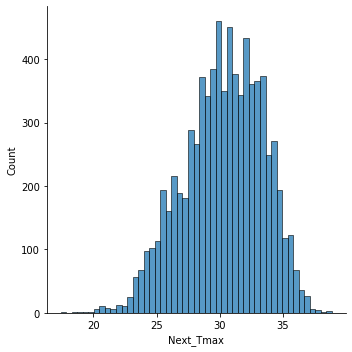

<Figure size 432x288 with 0 Axes>

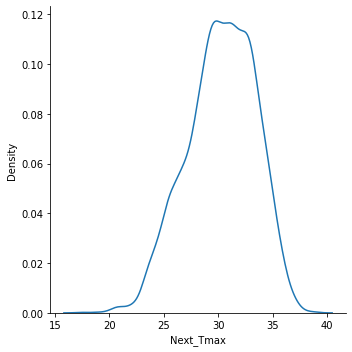

In [51]:
#kernel density estimate 
plt.figure()
sns.displot(df["Next_Tmax"])
plt.show()

plt.figure()
sns.displot(df["Next_Tmax"], kind = "kde")

In [52]:
print(df["Next_Tmax"].mean())

30.274886731391593


<Figure size 432x288 with 0 Axes>

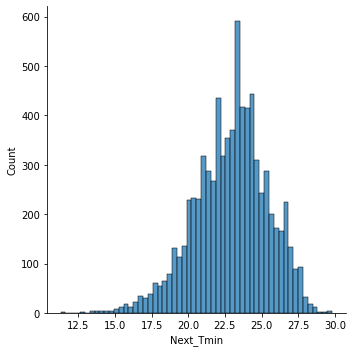

22.93222006472492


<Figure size 432x288 with 0 Axes>

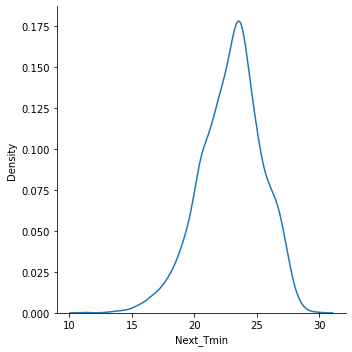

In [53]:
plt.figure()
sns.displot(df["Next_Tmin"])
plt.show()

plt.figure()
sns.displot(df["Next_Tmin"], kind = "kde")
print(df["Next_Tmin"].mean())

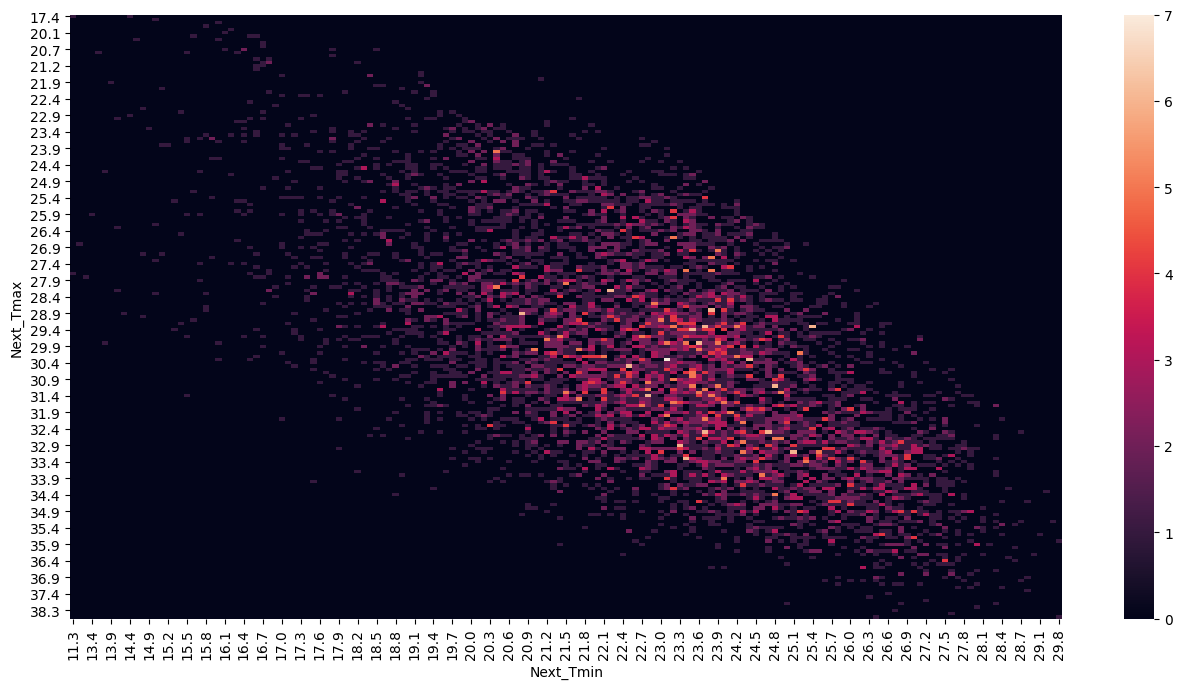

In [54]:
#frequency of occurance of Temp
plt.figure(figsize=(16,8),dpi=100)
sns.heatmap(pd.crosstab(df["Next_Tmax"], df["Next_Tmin"]))
plt.show()

**pairs around (31,23) are more in number**

In [55]:
cor =df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


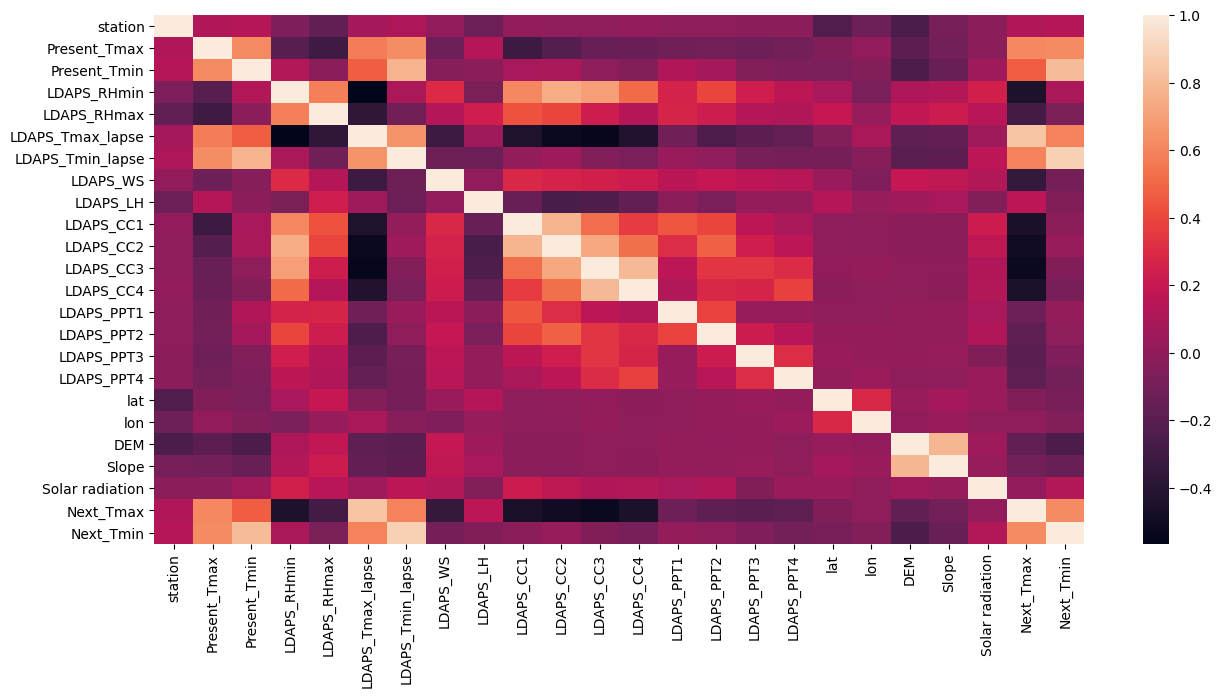

In [56]:
plt.figure(figsize=(15,7),dpi=100)
sns.heatmap(cor)
plt.show()

Present Tmax and present Tmin impacts Next temperature more (highly +ve)

LDAPS lapse (around 0.6)

cloud cover having very high negative corelation, precipitation has -ve corelation

solar radiation is almost having no effect on temp

> demographic and geographic feature have negative corelation 

In [57]:
#Data preprocessing
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [58]:
df.isna().sum()      #check for null count

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [59]:
df= df.drop(["Date"], axis=1)

In [60]:
df.shape

(7752, 24)

In [61]:
df = df.dropna(axis = 0)    #drop all the null values (cant fillna since corr high)

In [62]:
df.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [63]:
df.shape

(7588, 24)

In [64]:
def preprocessing(df):
    x= df.drop(["Next_Tmax","Next_Tmin"], axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    
    return x,y_max,y_min

In [65]:
#split data
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state =0)


In [66]:
x_train, y_max_train, y_min_train = preprocessing(trainset)
x_test, y_max_test, y_min_test = preprocessing(testset)

In [67]:
#training model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  
#GridSearchCrossValidation - tries different parameter values and explore best outcome

In [68]:
rf = RandomForestRegressor()

In [69]:
#estimator - model-rf, param_grid- hyperparameters for rf, cv - levels, n_jobs- processor usage count, verbosity - info managing
grids = GridSearchCV(estimator = rf,
                     param_grid= {'bootstrap':[True],
                                  'max_depth':[70, 130],
                                  'max_features':[3,6],
                                  'min_samples_leaf':[2,3],
                                  'min_samples_split':[4,8],
                                'n_estimators':[1000,500]},
                    cv=3,n_jobs=-1,verbose=2)


In [70]:
def findaccuracy(model, xf, yf):
    predictions= model.predict(xf)
    error = abs(predictions -yf)
    mape = 100 * np.mean(error/yf)
    accuracy = 100-mape
    print("error:", np.mean(error)," Accuracy:",accuracy)
    return accuracy
    
    

In [75]:
#exhaustive searching over the hyperparameter grid, find performance for each combination of parameters using crossvalidation
grids.fit(x_train, y_min_train)
print(grids.best_params_)
best_one = grids.best_estimator_
best_accuracy = findaccuracy(best_one,x_test, y_min_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  4.7min finished


{'bootstrap': True, 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1000}
error: 0.5484152943097012  Accuracy: 97.54014485270629


In [76]:
normal_model = RandomForestRegressor(n_estimators = 10, random_state = 42 )    #train a basic model and check its development
normal_model.fit(x_train,y_min_train)
normal_accuracy = findaccuracy(normal_model,x_test,y_min_test)

error: 0.6101910408432145  Accuracy: 97.26575272930057


In [77]:
print("how much improved:",((best_accuracy - normal_accuracy)/normal_accuracy)*100 )       #relative change in accuracy

how much improved: 0.2821055877389614
